In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Loading the cleaned dataset
zip_file_path = r"C:\Users\tanzi\Personal Projects\Market-Basket-Analysis\data\cleaned_transactions.zip"

import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as z:
    with z.open('cleaned_transactions.csv') as f:
        df = pd.read_csv(f, parse_dates=['date'])

In [3]:
df.head()

transaction_id                date      customer_name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
2      1000000002 2024-03-21 15:37:04        Lisa Graves   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             product  total_items  total_cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   payment_method           city        store_type  discount_applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1            Cash  San Francisco   Specialty Store              True   
2     Credit Card        Houston  Department Store              True   
3  Mobile Payment        Chicago          Pharmacy              True   
4      Debit Card        Houston   Specialty Store             False   

  customer_category  season                   promotion  year  month  \
0         Homemaker  Winter                         NaN  2022      1   
1      Professional    Fall      BOGO (Buy One Get One)  2023      3   
2      Professional  Winter                         NaN  2024      3   
3         Homemaker  Spring                         NaN  2020     10   
4       Young Adult  Winter  Discount on Selected Items  2020     12   

  day_of_week  hour  
0      Friday     6  
1   Wednesday    13  
2    Thursday    15  
3    Saturday     9  
4    Thursday     0

In [4]:
# Latest date in the dataset
max_date = df["date"].max()

In [5]:
# Defining Recency -- Refer to 04 file if needed
df["recency"] = (max_date - df["date"]).dt.days

In [6]:
# Defining churn threshold (customers who haven't purchased in 180+ days)
df["churn"] = (df["recency"] > 180).astype(int)

In [7]:
# Churn distribution
print(df["churn"].value_counts())

churn
1    886821
0    113179
Name: count, dtype: int64


In [8]:
df.head()

transaction_id                date      customer_name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
2      1000000002 2024-03-21 15:37:04        Lisa Graves   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             product  total_items  total_cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   payment_method           city        store_type  discount_applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1            Cash  San Francisco   Specialty Store              True   
2     Credit Card        Houston  Department Store              True   
3  Mobile Payment        Chicago          Pharmacy              True   
4      Debit Card        Houston   Specialty Store             False   

  customer_category  season                   promotion  year  month  \
0         Homemaker  Winter                         NaN  2022      1   
1      Professional    Fall      BOGO (Buy One Get One)  2023      3   
2      Professional  Winter                         NaN  2024      3   
3         Homemaker  Spring                         NaN  2020     10   
4       Young Adult  Winter  Discount on Selected Items  2020     12   

  day_of_week  hour  recency  churn  
0      Friday     6      848      1  
1   Wednesday    13      444      1  
2    Thursday    15       58      0  
3    Saturday     9     1295      1  
4    Thursday     0     1255      1

In [9]:
# Check basic statistics of recency
print(df["recency"].describe())

count    1000000.000000
mean         799.406105
std          461.920932
min            0.000000
25%          399.000000
50%          800.000000
75%         1199.000000
max         1599.000000
Name: recency, dtype: float64


In [10]:
# Proportion of churned vs. active customers
print(df["churn"].value_counts(normalize=True) * 100)

churn
1    88.6821
0    11.3179
Name: proportion, dtype: float64


In [11]:
# Churned customers
print("Sample of Churned Customers")
print(df[df["churn"] == 1].head(5))

Sample of Churned Customers
   transaction_id                date      customer_name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   
5      1000000005 2021-10-07 12:37:26     Joshua Frazier   

                                             product  total_items  total_cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   
5                          ['Toothpaste', 'Chicken']            3       72.24   

   payment_method           city       store_type  discount_applied  \
0  Mobile Payment    Los Angeles   Warehouse Club    

In [12]:
# Non-churned customers
print("Sample of Active Customers")
print(df[df["churn"] == 0].head(5))

Sample of Active Customers
    transaction_id                date    customer_name  \
2       1000000002 2024-03-21 15:37:04      Lisa Graves   
31      1000000031 2024-05-04 13:22:31     Kristin Webb   
46      1000000046 2024-05-10 23:21:05  Paula Maldonado   
48      1000000048 2024-04-17 00:49:23  Steven Clements   
58      1000000058 2024-01-11 05:41:42   James Mccarthy   

                                              product  total_items  \
2                                         ['Spinach']            6   
31  ['Extension Cords', 'Razors', 'Chips', 'Shampoo']            4   
46                                         ['Razors']           10   
48              ['Beef', 'Milk', 'Salmon', 'Shampoo']           10   
58                 ['Laundry Detergent', 'BBQ Sauce']            5   

    total_cost  payment_method     city         store_type  discount_applied  \
2        41.49     Credit Card  Houston   Department Store              True   
31       13.34      Debit Card  Houst

In [13]:
# Create new features for churn prediction
df["avg_order_value"] = df["total_cost"] / df["total_items"]  # Spending per item
df["purchase_frequency"] = df.groupby("customer_name")["transaction_id"].transform("count")  # Total purchases
df["days_since_first_purchase"] = (df["date"] - df.groupby("customer_name")["date"].transform("min")).dt.days
df["spending_variability"] = df.groupby("customer_name")["total_cost"].transform("std").fillna(0)
df["days_between_purchases"] = df.groupby("customer_name")["date"].diff().dt.days.fillna(0)

In [14]:
# Dropping unnecessary columns
df_ml = df[["total_cost", "total_items", "avg_order_value", "purchase_frequency", 
            "days_since_first_purchase", "spending_variability", "days_between_purchases", "churn"]]

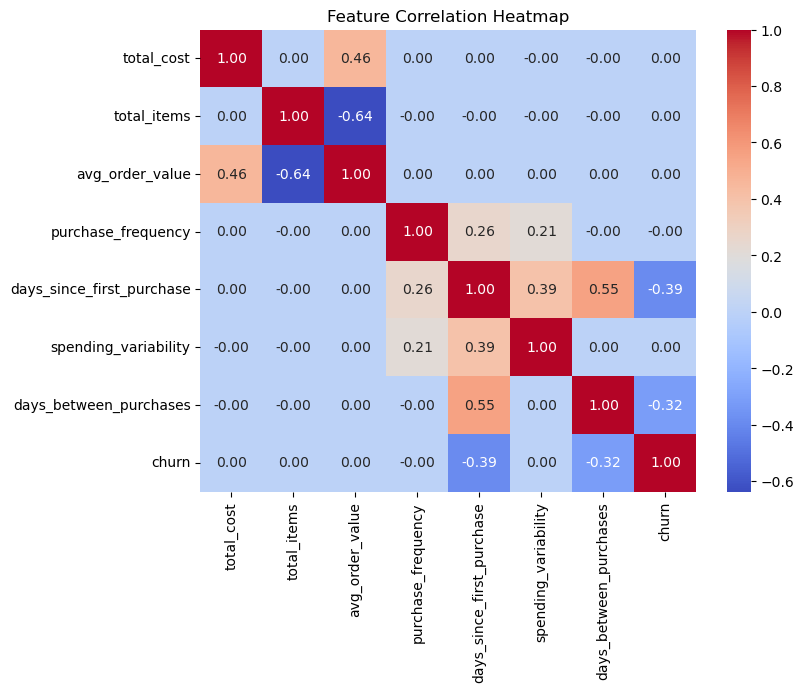

In [15]:
# Checking the correlation matirxi between features and churn
plt.figure(figsize=(8,6))
sns.heatmap(df_ml.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Select relevant features (removed 'recency' since it was too dominant)
features = ["total_cost", "total_items", "avg_order_value", "purchase_frequency", "days_since_first_purchase", "spending_variability", "days_between_purchases" ]
X = df_ml[features]
y = df_ml["churn"]

In [17]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Train Logistic Regression Model
clf_lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
clf_lr.fit(X_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [20]:
# Predict churn
y_pred_lr = clf_lr.predict(X_test_scaled)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.79204
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.71      0.44     22636
           1       0.96      0.80      0.87    177364

    accuracy                           0.79    200000
   macro avg       0.64      0.76      0.65    200000
weighted avg       0.88      0.79      0.82    200000



In [21]:
# Extract Feature Importance from Logistic Regression
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": np.abs(clf_lr.coef_[0])})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_6016\1818414215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="coolwarm")


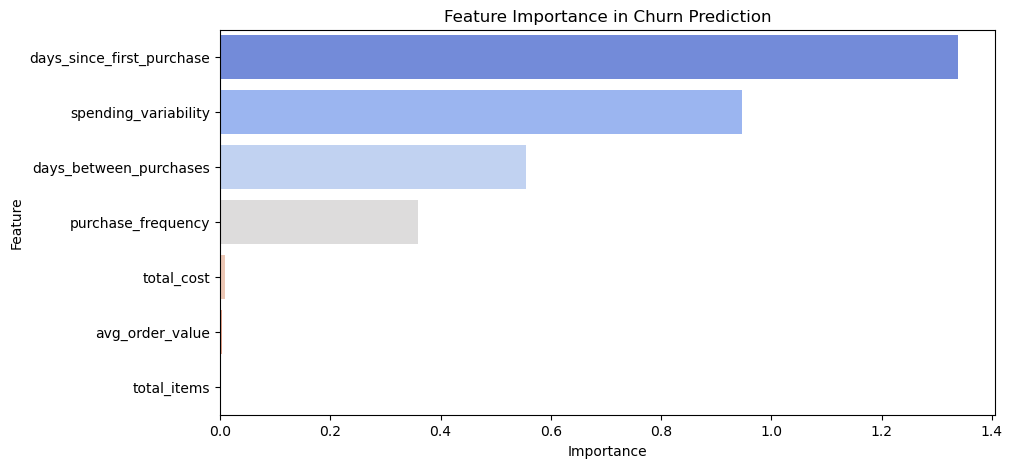

In [22]:
# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="coolwarm")
plt.title("Feature Importance in Churn Prediction")
plt.show()

In [23]:
# Define churn prevention strategies based on customer behavior
def churn_strategy(row):
    if row["purchase_frequency"] < 3:
        return "Send personalized discounts"
    elif row["spending_variability"] > 0.05:
        return "Offer stable discounts to encourage consistent spending"
    elif row["days_between_purchases"] > 30:
        return "Send re-engagement email after 30 days"
    else:
        return "Encourage engagement via targeted ads"

In [24]:
# Apply strategy to each customer
df["churn_strategy"] = df.apply(churn_strategy, axis=1)

In [25]:
# Show sample strategies
df[["customer_name", "purchase_frequency", "spending_variability", "days_between_purchases", "churn_strategy"]].head(10)

customer_name  purchase_frequency  spending_variability  \
0       Stacey Price                   3             14.222669   
1   Michelle Carlson                   7             35.339141   
2        Lisa Graves                   9             22.865992   
3  Mrs. Patricia May                   1              0.000000   
4     Susan Mitchell                  16             30.831061   
5     Joshua Frazier                   3              2.156023   
6   Victoria Garrett                   2             24.013346   
7      Sydney Waller                   2             15.789694   
8    Kimberly Morgan                  21             28.080268   
9        Lori Conway                   3             10.363918   

   days_between_purchases                                     churn_strategy  
0                     0.0  Offer stable discounts to encourage consistent...  
1                     0.0  Offer stable discounts to encourage consistent...  
2                     0.0  Offer stable discounts to encourage consistent...  
3                     0.0                        Send personalized discounts  
4                     0.0  Offer stable discounts to encourage consistent...  
5                     0.0  Offer stable discounts to encourage consistent...  
6                     0.0                        Send personalized discounts  
7                     0.0                        Send personalized discounts  
8                     0.0  Offer stable discounts to encourage consistent...  
9                     0.0  Offer stable discounts to encourage consistent...

In [26]:
df.head()

transaction_id                date      customer_name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
2      1000000002 2024-03-21 15:37:04        Lisa Graves   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             product  total_items  total_cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   payment_method           city        store_type  discount_applied  ...  \
0  Mobile Payment    Los Angeles    Warehouse Club              True  ...   
1            Cash  San Francisco   Specialty Store              True  ...   
2     Credit Card        Houston  Department Store              True  ...   
3  Mobile Payment        Chicago          Pharmacy              True  ...   
4      Debit Card        Houston   Specialty Store             False  ...   

  day_of_week hour recency  churn  avg_order_value purchase_frequency  \
0      Friday    6     848      1        23.883333                  3   
1   Wednesday   13     444      1        12.965000                  7   
2    Thursday   15      58      0         6.915000                  9   
3    Saturday    9    1295      1        39.340000                  1   
4    Thursday    0    1255      1         1.642000                 16   

   days_since_first_purchase  spending_variability  days_between_purchases  \
0                          0             14.222669                     0.0   
1                       1052             35.339141                     0.0   
2                       1421             22.865992                     0.0   
3                          0              0.000000                     0.0   
4                        176             30.831061                     0.0   

                                      churn_strategy  
0  Offer stable discounts to encourage consistent...  
1  Offer stable discounts to encourage consistent...  
2  Offer stable discounts to encourage consistent...  
3                        Send personalized discounts  
4  Offer stable discounts to encourage consistent...  

[5 rows x 25 columns]

In [27]:
df.to_csv(r"C:\Users\tanzi\Personal Projects\Market-Basket-Analysis\data\churn_analysis.csv", index=False)

In [28]:
# Summarize churn insights
churn_summary = {
    "Total Customers": len(df),
    "Churned Customers": df["churn"].sum(),
    "Active Customers": (df["churn"] == 0).sum(),
    "Churn Rate (%)": round(df["churn"].mean() * 100, 2),
    "Avg Spending Variability (Churned)": df[df["churn"] == 1]["spending_variability"].mean(),
    "Avg Spending Variability (Active)": df[df["churn"] == 0]["spending_variability"].mean(),
    "Avg Purchase Frequency (Churned)": df[df["churn"] == 1]["purchase_frequency"].mean(),
    "Avg Purchase Frequency (Active)": df[df["churn"] == 0]["purchase_frequency"].mean()
}

In [29]:
summary_df = pd.DataFrame(churn_summary.items(), columns=["Metric", "Value"])
print(summary_df)

summary_df.to_csv(r"C:\Users\tanzi\Personal Projects\Market-Basket-Analysis\data\churn_summary.csv", index=False)

                               Metric           Value
0                     Total Customers  1000000.000000
1                   Churned Customers   886821.000000
2                    Active Customers   113179.000000
3                      Churn Rate (%)       88.680000
4  Avg Spending Variability (Churned)       21.460451
5   Avg Spending Variability (Active)       21.429574
6    Avg Purchase Frequency (Churned)       16.469904
7     Avg Purchase Frequency (Active)       16.471686


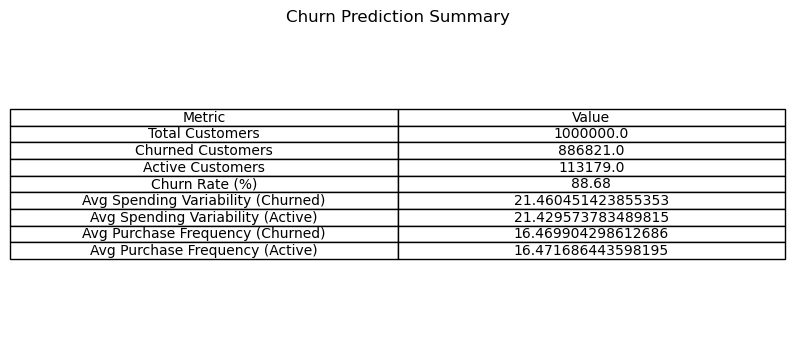

In [30]:
plt.figure(figsize=(10, 4))
plt.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
plt.axis("off")
plt.title("Churn Prediction Summary")
plt.show()